<a href="https://colab.research.google.com/github/Ufoan/Problema-optimizacion/blob/main/CSPSA_wigner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def cspsa_optimize(f, z0, a=3, A=0, s=1, b=0.1, r=0.166, max_iters=100, tol=1e-8):
    """
    Parámetros:
    - f: función objetivo
    - z0: punto inicial (complejo)
    - a, A, s, b, r: afectan el tamaño del paso de iteración
    - max_iters: número máximo de iteraciones
    - tol: tolerancia para la convergencia

    Retorna:
    - z_history: solución óptima encontrada
    - z_new: optimo
    """
    z = z0
    z_history = []
    for k in range(1, max_iters + 1):
        # Generar perturbación aleatoria compleja
        delta = np.random.randn() + 1j * np.random.randn()
        a_k = a/(k+1+A)**s
        c_k = b/(k+1)**r
        # Evaluar la función en los puntos perturbados
        f_plus = f(z + c_k*delta)
        f_minus = f(z - c_k*delta)

        # Estimar el gradiente
        grad_estimate = (f_plus - f_minus) / (2 * c_k * np.conj(delta))

        # Actualizar z
        z_new = z-a_k * grad_estimate
        z_history.append(z_new)

        # Verificar convergencia
        if np.abs(z_new - z) < tol:
            return z_history, z_new

        z = z_new

    print("Número máximo de iteraciones alcanzado.")
    return z_history, z_new


(4.6963530741903704e-05+7.062855659152239e-05j)


<ipython-input-9-38368f82a79f>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


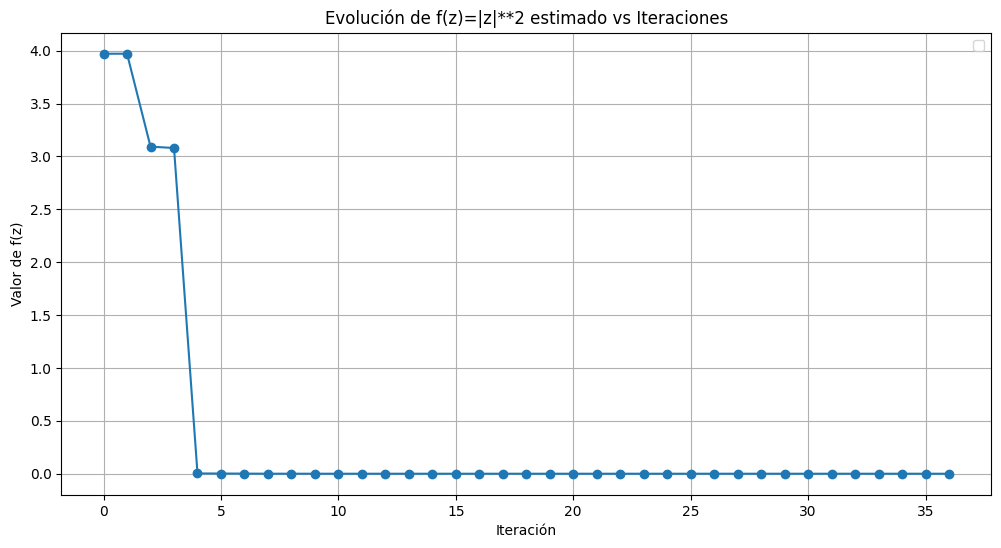

In [ ]:
# Función objetivo
#def objective(z):
#    return np.abs(z)**2

# Punto inicial
#z0 = np.random.randn() + 1j * np.random.randn()

# Optimización
#z_list,z_opt = cspsa_optimize(objective, z0)
#iterations = np.arange(len(z_list))
#f_z = [objective(z) for z in z_list]
#print(z_opt)
#plt.figure(figsize=(12, 6))
#plt.plot(iterations, f_z, marker='o')
#plt.xlabel('Iteración')
#plt.ylabel('Valor de f(z)')
#plt.title('Evolución de f(z)=|z|**2 estimado vs Iteraciones')
#plt.grid(True)
#plt.legend()
#plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Función de wigner estado coherente dado alpha y beta, con alpha=x_0+ip_0 y beta=x+ip
def wigner_estado_coherente(alpha,beta):
    x_0=np.real(alpha)
    p_0=np.imag(alpha)
    x=np.real(beta)
    p=np.imag(beta)
    return (2/beta)*np.exp(-2*((x_0-x)**2+(p_0-p)**2))

In [4]:
def objective(z):
    return wigner_estado_coherente(2.5,z)

Número máximo de iteraciones alcanzado.
(0.5697025534152659+0.8562941883273826j)


<ipython-input-14-e2f360155fd8>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


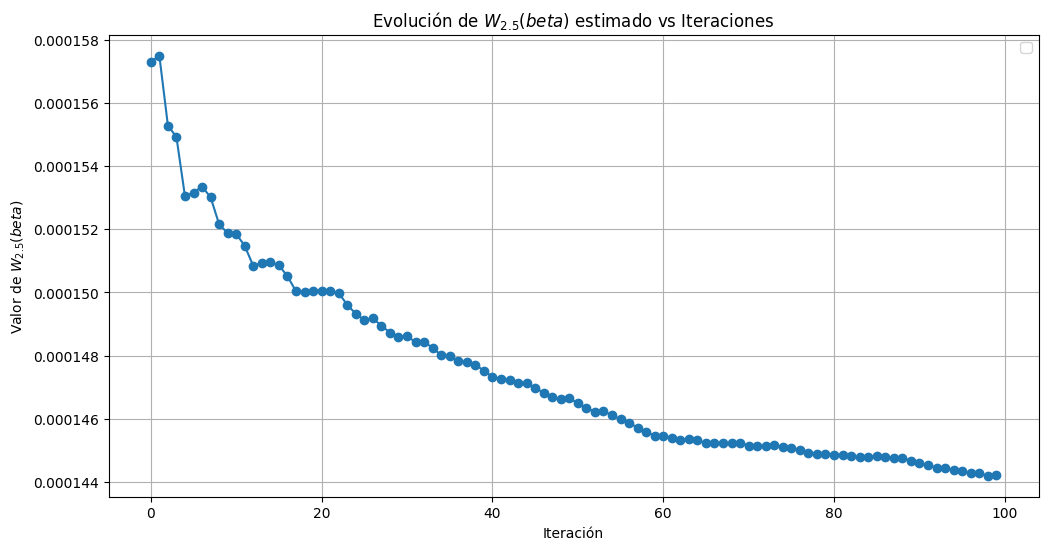

In [14]:
# Punto inicial
z0 = np.random.randn() + 1j * np.random.randn()

# Optimización
z_list,z_opt = cspsa_optimize(objective, z0) #optimize es la función de antes
iterations = np.arange(len(z_list))
f_z = [objective(z) for z in z_list]
print(z_opt)
plt.figure(figsize=(12, 6))
plt.plot(iterations, f_z, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Valor de $W_{2.5}(beta)$')
plt.title('Evolución de $W_{2.5}(beta)$ estimado vs Iteraciones')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
len(z_list)

100

In [15]:
# Función de interferencia en el estado "gato"
def wigner_interferencia(alpha,beta):
    x_0=np.real(alpha)
    p_0=np.imag(alpha)
    x=np.real(beta)
    p=np.imag(beta)
    return (2/beta)*np.exp(-2*(x**2+p**2)-(x_0**2+p_0**2))*np.cos(4*np.imag(beta.conjugate()*alpha))

# Función de Wigner para el estado "gato"
def wigner_gato(alpha,beta):
    # Factor de normalización
    norm = 1 / (2 + 2 * np.exp(-2 * abs(alpha)**2))

    # Contribuciones individuales
    w_coh_plus = wigner_estado_coherente(alpha,beta)
    w_coh_minus = wigner_estado_coherente(-alpha,beta)
    w_interf = wigner_interferencia(alpha,beta)

    # Suma total
    return norm * (w_coh_plus + w_coh_minus + w_interf)


In [16]:
def objective(z):
    return wigner_gato(2.5,z)

Número máximo de iteraciones alcanzado.
(0.3390694479178634-0.2693763285955235j)


<ipython-input-27-e2f360155fd8>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


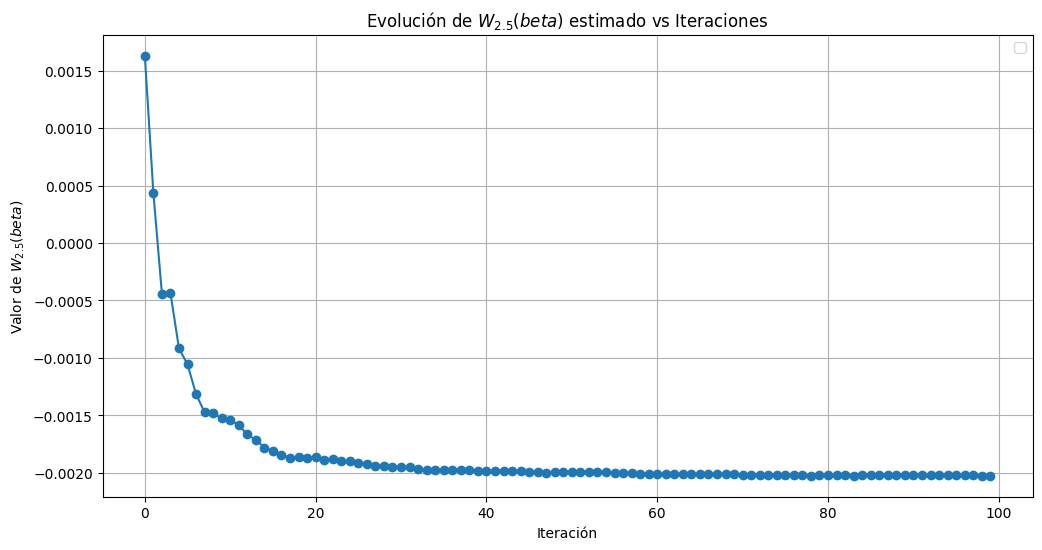

In [27]:
# Punto inicial
z0 = np.random.randn() + 1j * np.random.randn()

# Optimización
z_list,z_opt = cspsa_optimize(objective, z0) #optimize es la función de antes
iterations = np.arange(len(z_list))
f_z = [objective(z) for z in z_list]
print(z_opt)
plt.figure(figsize=(12, 6))
plt.plot(iterations, f_z, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Valor de $W_{2.5}(beta)$')
plt.title('Evolución de $W_{2.5}(beta)$ estimado vs Iteraciones')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-25-dfe2b3773cc9>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  wigner_values[i, j] = wigner_gato(2.5, beta)


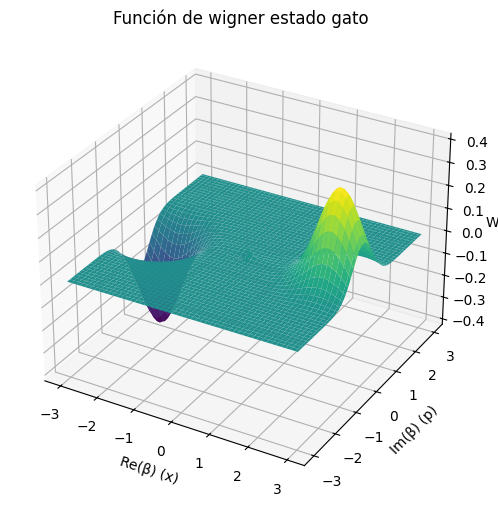

In [25]:

x = np.linspace(-3, 3, 100)
p = np.linspace(-3, 3, 100)
x_grid, p_grid = np.meshgrid(x, p)


wigner_values = np.zeros_like(x_grid)
for i in range(len(x)):
    for j in range(len(p)):
        beta = x_grid[i, j] + 1j * p_grid[i, j]
        wigner_values[i, j] = wigner_gato(2.5, beta)


fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, p_grid, wigner_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Re(β) (x)')
ax.set_ylabel('Im(β) (p)')
ax.set_zlabel('W(β)')
ax.set_title('Función de wigner estado gato')
plt.show()

In [70]:
results =[]
for i in range(50):
    # Punto inicial
    z0 = np.random.randn() + 1j * np.random.randn()
    # Optimización
    z_list,z_opt = cspsa_optimize(objective, z0)
    results.append(z_list)

Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.
Número máximo de iteraciones alcanzado.


In [30]:
import pandas as pd

In [71]:
df = pd.DataFrame(results).transpose()

In [38]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.646125+0.994802j,-1.520441+0.643257j,0.037601+1.804250j,0.713701+1.289813j,2.360123+1.011217j,-0.963348+0.035457j,0.472789-0.065881j,1.087440-0.645441j,-0.412698-0.222519j,1.696135-1.681872j
1,-0.646010+0.994541j,-1.512400+0.514191j,0.037597+1.804247j,0.713655+1.289817j,2.383130+1.001285j,-0.995330+0.015350j,0.483479-0.072320j,1.058900-0.656809j,-0.419753-0.210903j,1.697064-1.685072j
2,-0.646091+0.994590j,-1.626203+0.400227j,0.037596+1.804247j,0.713852+1.290004j,2.452141+1.144095j,-1.007241+0.024791j,0.488765-0.080966j,1.040485-0.668677j,-0.413262-0.199817j,1.698280-1.686890j
3,-0.646091+0.994562j,-1.795920+0.336789j,0.037596+1.804247j,0.713896+1.289980j,2.430770+1.160886j,-1.041771+0.018343j,0.484294-0.083301j,1.043600-0.677240j,-0.405006-0.191041j,1.697656-1.687625j
4,-0.646039+0.994479j,-1.875423+0.353789j,0.037589+1.804248j,0.713811+1.290109j,2.459760+1.215784j,-1.070364+0.007636j,0.485003-0.089909j,1.034147-0.680080j,-0.399183-0.183205j,1.697870-1.689141j


In [72]:
df_wigner_values = df.map(lambda x: np.real(wigner_gato(2.5,x)))

In [73]:
df_wigner_values.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000346,-0.000034,-0.002121,-0.000637,-0.000041,-1.155701e-08,-0.000004,-1.161832e-08,-0.000022,-0.000003,...,-0.161892,-0.002533,0.000065,0.000047,-0.003521,-0.000322,-0.000003,0.000005,-0.000009,-0.000603
1,0.000335,-0.000034,-0.002242,-0.000611,0.000005,-1.155643e-08,-0.000004,-1.161831e-08,-0.000022,-0.000110,...,-0.348772,-0.002614,0.000062,0.000047,-0.004082,-0.000339,-0.000003,0.000005,-0.000009,-0.000604
2,0.000330,-0.000034,-0.002493,-0.000669,0.000014,-1.155625e-08,-0.000004,-1.161834e-08,-0.000022,-0.000089,...,-0.402602,-0.002624,0.000065,0.000047,-0.004624,-0.000348,-0.000003,0.000005,-0.000009,-0.000604
3,0.000333,-0.000034,-0.002553,-0.000578,0.000034,-1.155750e-08,-0.000004,-1.161833e-08,-0.000022,-0.000118,...,-0.408350,-0.002732,0.000070,0.000047,-0.005169,-0.000350,-0.000003,0.000005,-0.000009,-0.000605
4,0.000332,-0.000034,-0.002702,-0.000534,0.000059,-1.155711e-08,-0.000004,-1.161834e-08,-0.000022,-0.000141,...,-0.407916,-0.002832,0.000067,0.000047,-0.005775,-0.000359,-0.000003,0.000005,-0.000009,-0.000605


In [52]:
df_wigner_values.iloc[0].min()

-0.03578718589455387

In [53]:
df_wigner_values.iloc[0].max()

0.04453367711449211

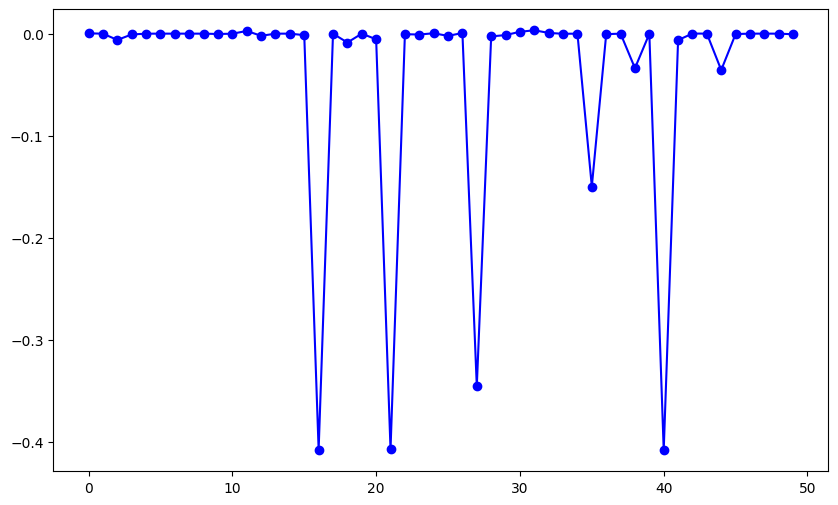

In [74]:
#Minimo por iteración
plt.figure(figsize=(10, 6))
plt.plot(df_wigner_values.min().index, df_wigner_values.min().values, marker='o', linestyle='-', color='b')

In [68]:
df_wigner_values.plot